# 1. Inputs, Targets and Tagger Outputs

To load the relevant packages, files and basic data structure, just execute the following cells. This will also give you a first glimpse into what the files contain as information.

In [1]:
import uproot

In [2]:
import awkward as ak

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
filelist_TTToSemileptonic = [f'/eos/user/c/cmsdas/2023/short-ex-ftag/samples/TTToSemileptonic/pfnano-{k}.root' for k in range(5)]
# for Run 3, TTToSemileptonic is "TTTo2J1L1Nu"

In [6]:
filelist_TTToSemileptonic # we'll most likely only use the first one for this exercise to get the idea, but if you want to increase stats, there you go

['/eos/user/c/cmsdas/2023/short-ex-ftag/samples/TTToSemileptonic/pfnano-0.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/TTToSemileptonic/pfnano-1.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/TTToSemileptonic/pfnano-2.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/TTToSemileptonic/pfnano-3.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/TTToSemileptonic/pfnano-4.root']

In [7]:
filelist_QCD_Pt_170_300 = [f'/eos/user/c/cmsdas/2023/short-ex-ftag/samples/QCD_Pt_170_300/pfnano-{k}.root' for k in range(5)]

In [8]:
filelist_QCD_Pt_170_300 # same comment, more files than strictly necessary

['/eos/user/c/cmsdas/2023/short-ex-ftag/samples/QCD_Pt_170_300/pfnano-0.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/QCD_Pt_170_300/pfnano-1.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/QCD_Pt_170_300/pfnano-2.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/QCD_Pt_170_300/pfnano-3.root',
 '/eos/user/c/cmsdas/2023/short-ex-ftag/samples/QCD_Pt_170_300/pfnano-4.root']

In [9]:
sample_file = uproot.open(filelist_TTToSemileptonic[0])
whats_inside = sample_file['Events'].keys() # 'Events' is the relevant entry-point into the many branches stored with event and object information

In [10]:
whats_inside

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_z',
 'BeamSpot_zError',
 'BeamSpot_type',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'CorrT1METJet_area',
 'CorrT1METJet_eta',
 'CorrT1METJet_muonSubtrFactor',
 'CorrT1METJet_phi',
 'CorrT1METJet_rawPt',
 'nJetPFCands',
 'JetPFCands_pt',
 'JetPFCands_btagEtaRel',
 'JetPFCands_btagPtRatio',
 'JetPFCands_btagPParRatio',
 'JetPFCands_btagSip3dVal',
 'Je

In [11]:
jet_keys = sample_file['Events'].keys(filter_name=['Jet_*']) # you can also use regular-expression like syntax to select only certain keys matching given pattern
jet_keys # in this exercise, we will work with so called AK4 jets (i.e. radius R = 0.4), in NanoAOD and PFNano abbreviated with "Jet"

['Jet_area',
 'Jet_btagCSVV2',
 'Jet_btagDeepB',
 'Jet_btagDeepCvB',
 'Jet_btagDeepCvL',
 'Jet_btagDeepFlavB',
 'Jet_btagDeepFlavCvB',
 'Jet_btagDeepFlavCvL',
 'Jet_btagDeepFlavQG',
 'Jet_chEmEF',
 'Jet_chHEF',
 'Jet_eta',
 'Jet_hfsigmaEtaEta',
 'Jet_hfsigmaPhiPhi',
 'Jet_mass',
 'Jet_muEF',
 'Jet_muonSubtrFactor',
 'Jet_neEmEF',
 'Jet_neHEF',
 'Jet_phi',
 'Jet_pt',
 'Jet_rawFactor',
 'Jet_electronIdx1',
 'Jet_electronIdx2',
 'Jet_hfadjacentEtaStripsSize',
 'Jet_hfcentralEtaStripSize',
 'Jet_jetId',
 'Jet_muonIdx1',
 'Jet_muonIdx2',
 'Jet_nElectrons',
 'Jet_nMuons',
 'Jet_nConstituents',
 'Jet_DeepJet_Cpfcan_puppiw_0',
 'Jet_DeepJet_Cpfcan_drminsv_0',
 'Jet_DeepJet_Cpfcan_ptrel_0',
 'Jet_DeepJet_Cpfcan_chi2_0',
 'Jet_DeepJet_Cpfcan_BtagPf_trackDeltaR_0',
 'Jet_DeepJet_Cpfcan_BtagPf_trackEtaRel_0',
 'Jet_DeepJet_Cpfcan_BtagPf_trackJetDistVal_0',
 'Jet_DeepJet_Cpfcan_BtagPf_trackPPar_0',
 'Jet_DeepJet_Cpfcan_BtagPf_trackPParRatio_0',
 'Jet_DeepJet_Cpfcan_BtagPf_trackPtRel_0',
 'Jet_DeepJ

In [12]:
# jets = sample_file['Events'].arrays(jet_keys) # there are multiple ways to actually get the arrays corresponding to the keys, one is here
# jets

In [13]:
# another way to get the info, useful if you want to specify the library for further processing (if different from ak)
# or if you want to use chunks (here: all entries as an example, could be another integer)
for sample_jets in sample_file['Events'].iterate(jet_keys, step_size=sample_file['Events'].num_entries, library='ak'):
    break

In [14]:
sample_jets

<Array [{Jet_area: [...], ...}, ..., {...}] type='68448 * {Jet_area: var * ...'>

## Input and target study

1. Plot the following quantities in histograms, inclusively for all jets:
   - Jet_eta
   - Jet_pt
   - Jet_DeepCSV_jetNSelectedTracks
   - Jet_DeepCSV_vertexMass
   - Jet_DeepCSV_jetNSecondaryVertices
   - Jet_DeepJet_Cpfcan_BtagPf_trackSip2dSig_0
   - Jet_DeepJet_Cpfcan_BtagPf_trackSip2dSig_5
   - Jet_DeepJet_Cpfcan_BtagPf_trackDeltaR_0
   - Jet_DeepJet_Cpfcan_BtagPf_trackDeltaR_5
   - Jet_DeepJet_Npfcan_drminsv_0
   - Jet_DeepJet_Npfcan_drminsv_5
   - Jet_DeepJet_Npfcan_deltaR_0
   - Jet_DeepJet_Npfcan_deltaR_5
   - Jet_DeepJet_sv_enratio_0
   - Jet_DeepJet_sv_enratio_2  
   _Hint:_ It may be useful to write a function for convenience and just call the function multiple times.
2. Obtain the truth flavour of the jets by utilizing some of the following branches as introduced in the introductory presentation:
   - Jet_hadronFlavour
   - Jet_partonFlavour
   - Jet_nBHadrons
   - Jet_nCHadrons
     
   (You can also use the fine-grained branch Jet_FlavSplit, what the respective digits represent is given in the documentation)
   
    a) Show the truth flavour distribution for all jets, up to the level of this granularity if you use the two branches mentioned first: b, bb, c, udsg via a histogram. Not all branches mentioned above are necessary to obtain said targets, find the correct combination.  
   b) Store the flavour array for later usage. _It will be used for slicing in the next question:_
3. Plot the same quantities as in 1., but now split them by flavour (into the four categories from above). Describe the distributions by answering the following questions:
   - Which distributions are suitable to separate jet flavour? Which distributions show less dependency on flavour?
   - For those distributions with varying indices (0,2,5), how does the index influence the behavior of the respective feature? If you need further information on how these quantities have been computed, have a look in the documentation and search for the respective variable.

(0.0, 11651.22)

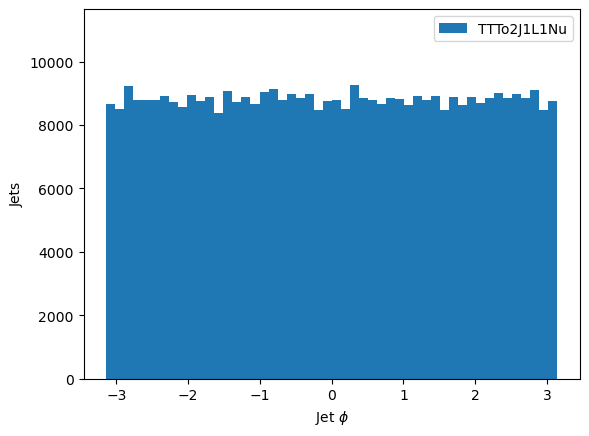

In [15]:
# Example for 1.:
jet_phi = ak.flatten(sample_jets['Jet_phi'], axis=-1)

plt.hist(jet_phi, bins=50, label='TTTo2J1L1Nu')
plt.xlabel(r'Jet $\phi$')
plt.ylabel(r'Jets')
plt.legend()
axes = plt.gca()
y_lower, y_upper = axes.get_ylim()
plt.ylim([y_lower, y_upper * 1.2])

In [16]:
# Your code for 1. here

(0.0, 214326.0)

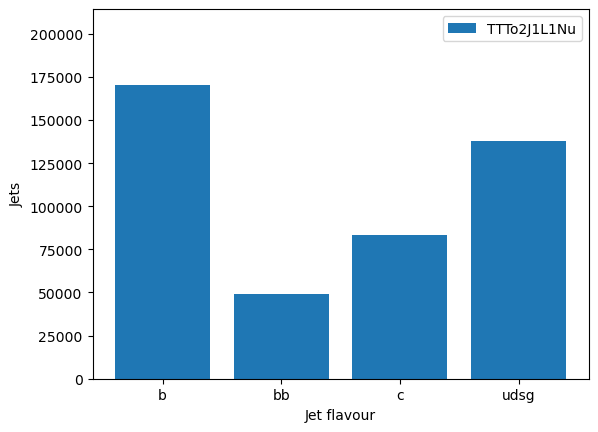

In [17]:
# Hint for 2., using artificial flavour distribution as an example:
rng = np.random.default_rng(seed = 42)
def example_flavour(N):
    flavour_samples = rng.choice(np.arange(4), size = N, p = [0.386, 0.111, 0.189, 0.314])
    return flavour_samples
dummy_flavour = example_flavour(len(jet_phi))
histo, bins = np.histogram(dummy_flavour, bins=np.arange(5))
plt.bar(['b','bb','c','udsg'], histo, label='TTTo2J1L1Nu')
plt.xlabel(r'Jet flavour')
plt.ylabel(r'Jets')
plt.legend()
axes = plt.gca()
y_lower, y_upper = axes.get_ylim()
plt.ylim([y_lower, y_upper * 1.2])

In [18]:
# Now your turn to plot the distribution from the sample and answer question 2 here
# Use a suitable combination of the mentioned branches to get the truth array and produce a plot similar to the above

In [19]:
# Hint for 3., slicing arrays with arrays to split by flavour
jet_phi[dummy_flavour == 0] # would be representing b flavour, using the notation from the example in Hint No. 2
# similar for other flavours
# plot them into same figure, make sure to use labels / legend
# decide if histogram normalization improves interpretability of the figure due to class imbalance

<Array [2.62, -0.854, -2.09, ..., 1.02, -0.841, -1.74] type='170100 * float32'>

In [20]:
# Your code for question 3. here

## Tagger outputs

In the present files, you have access to several pre-computed tagger output distributions, coming from various generations of algorithms. The b-tagging / flavour-tagging scores or discriminators start with `Jet_btag`, then further specify the specific network and, if multi-classification, also which output score or which discriminator is stored. DeepFlav is another way to name DeepJet, if it's just "btagDeep", this refers to DeepCSV.

1. Plot all available tagger output scores (if available, individual probabilities) and discriminators, split by flavour.
2. For B, CvB, CvL discriminators, compare DeepCSV and DeepJet qualitatively. Describe the structure close to 0, 1 and if there are particularly outstanding, unexpected values.
3. _(Bonus)_ If you finish the above before our first group discussion, run the cells also for one example file of the other set of samples (QCD_Pt_170_300) and compare with the results for semileptonic $t\bar{t}$ events. Are there noticable differences?

In [21]:
# Hint for 1.: you have already learned how to split by flavour in a previous question,
#     and to get all the branches that we ask for, utilize the regular-expression-trick introduced at the beginning
#     (as you may want to automize this instead of searching and copy-pasting...)
# Hint for 2.: remember how discriminators of type XvsY are defined to answer the second part
# Hint for 3.: Start from the inputs with the comparison, this will give you the full picture.

In [22]:
# Your code for tagger outputs here